<a href="https://www.kaggle.com/code/mohamednasr24/car-damage-classifier-org?scriptVersionId=130116550" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#import necessary librabry
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#defining the base, train and validation directory path
base_dir = '../input/car-damage-detection/data1a'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [3]:
#defining the damage and whole , train nand validation directory
train_damage_dir = os.path.join(train_dir, '00-damage')
train_whole_dir = os.path.join(train_dir, '01-whole')
validation_damage_dir = os.path.join(validation_dir, '00-damage')
validation_whole_dir = os.path.join(validation_dir, '01-whole')

Data Augmentation is used to:
1. Rescale the data 
2. to bring all the image to same dimension  i.e. 150x150


In [4]:
#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(240,220), 
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(240,220),
        batch_size=20,
        class_mode='binary')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [6]:
#defining model
from tensorflow.keras import Model 
from tensorflow.keras.applications import DenseNet121   

base_model = DenseNet121(input_shape = (240,220, 3),  include_top = False, weights = 'imagenet') 

x=   tf.keras.layers.Flatten()(base_model.output)
x=   tf.keras.layers.Dense(512, activation='relu')(x) 
x=   tf.keras.layers.Dense(1, activation='sigmoid')(x) 

model= Model( base_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['Accuracy','Precision','Recall'])

#training the model
history = model.fit(train_generator, epochs=20,
                    validation_data=validation_generator, verbose=2)

29097984/29084464 [==============================] - 1s 0us/step
Epoch 1/20
92/92 - 57s - loss: 0.6781 - Accuracy: 0.8440 - precision: 0.8400 - recall: 0.8500 - val_loss: 0.1732 - val_Accuracy: 0.9391 - val_precision: 0.9316 - val_recall: 0.9478
Epoch 2/20
92/92 - 17s - loss: 0.1505 - Accuracy: 0.9408 - precision: 0.9422 - recall: 0.9391 - val_loss: 0.2318 - val_Accuracy: 0.9522 - val_precision: 0.9906 - val_recall: 0.9130
Epoch 3/20
92/92 - 17s - loss: 0.0929 - Accuracy: 0.9783 - precision: 0.9772 - recall: 0.9793 - val_loss: 0.3019 - val_Accuracy: 0.9565 - val_precision: 0.9688 - val_recall: 0.9435
Epoch 4/20
92/92 - 18s - loss: 0.0442 - Accuracy: 0.9891 - precision: 0.9891 - recall: 0.9891 - val_loss: 0.9380 - val_Accuracy: 0.9283 - val_precision: 0.9950 - val_recall: 0.8609
Epoch 5/20
92/92 - 17s - loss: 0.0725 - Accuracy: 0.9864 - precision: 0.9859 - recall: 0.9870 - val_loss: 0.6325 - val_Accuracy: 0.9413 - val_precision: 0.9856 - val_recall: 0.8957
Epoch 6/20
92/92 - 18s - loss:

In [7]:
#weights saving
model.save("classifier.h5")

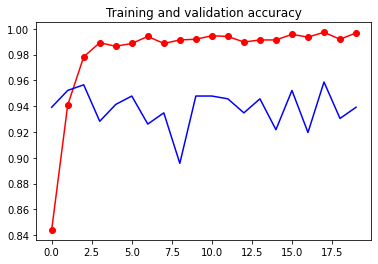

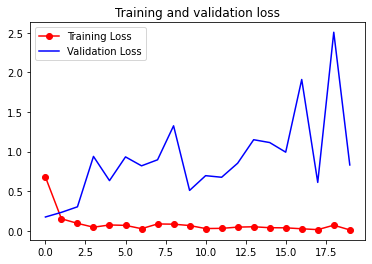

In [8]:
# plotting the history of train and validation loss, accurcy, precision, recall
import matplotlib.pyplot as plt
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro-', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

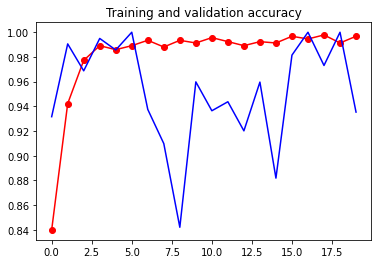

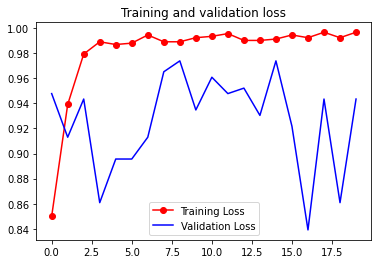

In [9]:
import matplotlib.pyplot as plt
acc = history.history['precision']
val_acc = history.history['val_precision']
loss = history.history['recall']
val_loss = history.history['val_recall']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro-', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

The car is not damaged


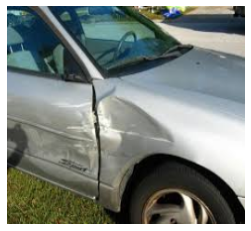

In [10]:
# test
import cv2
im = cv2.imread("../input/car-damage-detection/data1a/validation/00-damage/0019.JPEG")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (240,220)) 
imS=im.reshape([1,240,220,3])
pred=model.predict(np.array(imS))
if pred[0][0]>0.5:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)

[0.]
The car is damaged


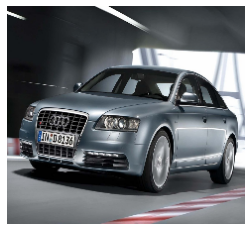

In [11]:
im = cv2.imread("../input/car-damage-detection/data1a/validation/01-whole/0027.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (240, 220)) 
imS=im.reshape([1,240,220,3])
pred=model.predict(np.array(imS))
print(pred[0])
if pred[0][0]<0.5:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)
